In [2]:
from openmeteo_api import fetch_weather_data
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Example Usage
latitude = 36.721962
longitude = -119.236272
start_date = "2024-11-01"
end_date = "2024-12-01"
# Select only the variables you need
variables = ["temperature_2m_max", "temperature_2m_min", "precipitation_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max"]
timezone="GMT"

In [ ]:
weather_data = fetch_weather_data(latitude, longitude, start_date, end_date, variables,timezone)
weather_data.head()

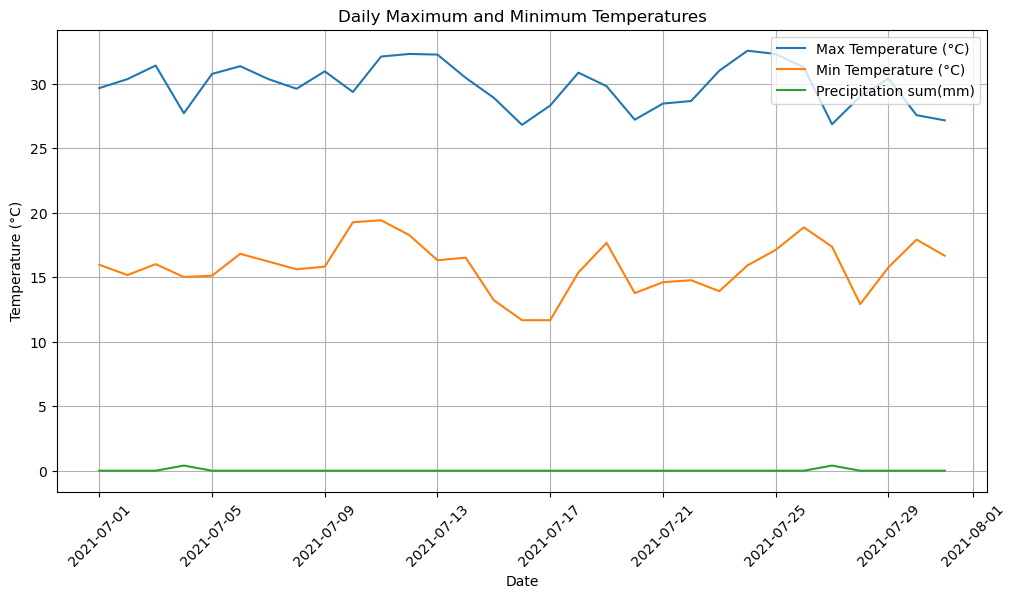

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(weather_data.iloc[:, 0],weather_data.iloc[:, 1], label="Max Temperature (°C)")
plt.plot(weather_data.iloc[:, 0],weather_data.iloc[:, 2], label="Min Temperature (°C)")
plt.plot(weather_data.iloc[:, 0],weather_data.iloc[:, 3], label="Precipitation sum(mm)")

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Maximum and Minimum Temperatures")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [1]:
from mtbs_utils import initialize_gee,display_mtbs_by_event_id,get_mtbs_properties,unix_to_date,get_month_start_end

In [2]:
initialize_gee()

Google Earth Engine initialized successfully.


In [3]:
# Example usage of the function
start_date = '2016-01-01'
end_date = '2021-12-31'
bbox = [-124.4, 32.5, -114.1, 42.0]  # Bounding box for California
event_id = 'CA3983912034520210702'  # Replace with your desired Event ID


In [4]:
# Call the function and get the DataFrame
df = get_mtbs_properties(event_id)
df

,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Comment,Event_ID,High_T,Ig_Date,IncGreen_T,Incid_Name,...,Map_ID,Map_Prog,Mod_T,NoData_T,Perim_ID,Post_ID,Pre_ID,dNBR_offst,dNBR_stdDv,irwinID
0,Initial,108368,39.957,-120.181,CA3987512036820210703 is a duplicate of this f...,CA3983912034520210702,650,1625209200000,-150,SUGAR,...,10024011,MTBS,450,-970,,804303220210805,804303220200701,44,32,33088F36-F802-4500-86A4-82DA6A62425F


In [5]:
event_date= df['Ig_Date'].apply(unix_to_date).iloc[0]
# event_start_date = unix_to_date(event_date)
event_latitude = df['BurnBndLat'].iloc[0]
event_longitude= df['BurnBndLon'].iloc[0]

In [23]:
event_date


'2021-07-02 07:00:00'

In [6]:
start_date,end_date =get_month_start_end(event_date)

In [11]:
print(start_date,end_date,event_longitude,event_latitude)

2021-07-01 2021-07-31 -120.181 39.957


In [ ]:
variables = ["temperature_2m_max", "temperature_2m_min", "precipitation_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max"]
timezone="GMT"
weather_data = fetch_weather_data(event_latitude,event_longitude, start_date, end_date, variables,timezone)
weather_data

,date,temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2021-07-01 00:00:00+00:00,29.674002,15.974,0.0,0.0,21.986542,28.799999
1,2021-07-02 00:00:00+00:00,30.374001,15.174,0.0,0.0,17.294992,27.000000
2,2021-07-03 00:00:00+00:00,31.424002,16.024,0.0,0.0,44.281464,58.320000
3,2021-07-04 00:00:00+00:00,27.724001,15.024,0.4,1.0,23.277834,40.320000
4,2021-07-05 00:00:00+00:00,30.774000,15.124,0.0,0.0,20.966715,25.919998


In [25]:
weather_data.head()

,date,temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2021-07-01 00:00:00+00:00,29.674002,15.974,0.0,0.0,21.986542,28.799999
1,2021-07-02 00:00:00+00:00,30.374001,15.174,0.0,0.0,17.294992,27.000000
2,2021-07-03 00:00:00+00:00,31.424002,16.024,0.0,0.0,44.281464,58.320000
3,2021-07-04 00:00:00+00:00,27.724001,15.024,0.4,1.0,23.277834,40.320000
4,2021-07-05 00:00:00+00:00,30.774000,15.124,0.0,0.0,20.966715,25.919998
